<a href="https://colab.research.google.com/github/Avipsa-Bhujabal/Parkinsons_Disease/blob/main/Parkinsons_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/My\ Drive/parkinsons.zip

Archive:  drive/My Drive/parkinsons.zip
  inflating: parkinsons.data         


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = pd.read_csv('parkinsons.data')

In [ ]:
# Split data into features and target
X = data.drop(['name', 'status'], axis=1)
y = data['status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate Support Vector Machine classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

# Train and evaluate Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_pred)
rfc_cm = confusion_matrix(y_test, rfc_pred)

# Train and evaluate Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
nb_cm = confusion_matrix(y_test, nb_pred)

# Train and evaluate K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_cm = confusion_matrix(y_test, knn_pred)

# Print results
print('Support Vector Machine:')
print('Accuracy:', svm_acc)
print('Confusion Matrix:', svm_cm)
print()
print('Random Forest:')
print('Accuracy:', rfc_acc)
print('Confusion Matrix:', rfc_cm)
print()
print('Naive Bayes:')
print('Accuracy:', nb_acc)
print('Confusion Matrix:', nb_cm)
print()
print('K-Nearest Neighbors:')
print('Accuracy:', knn_acc)
print('Confusion Matrix:', knn_cm)


Support Vector Machine:
Accuracy: 0.8717948717948718
Confusion Matrix: [[ 4  3]
 [ 2 30]]

Random Forest:
Accuracy: 0.9487179487179487
Confusion Matrix: [[ 5  2]
 [ 0 32]]

Naive Bayes:
Accuracy: 0.717948717948718
Confusion Matrix: [[ 4  3]
 [ 8 24]]

K-Nearest Neighbors:
Accuracy: 0.9487179487179487
Confusion Matrix: [[ 5  2]
 [ 0 32]]


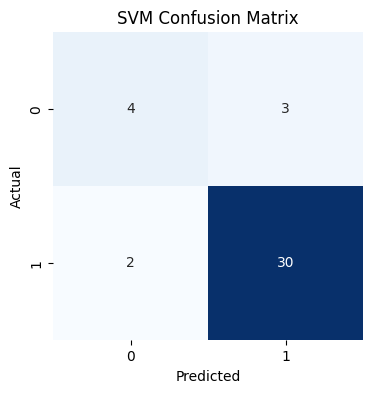

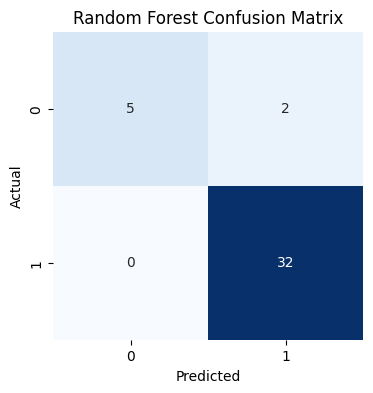

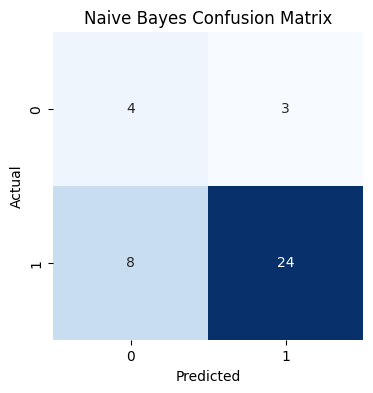

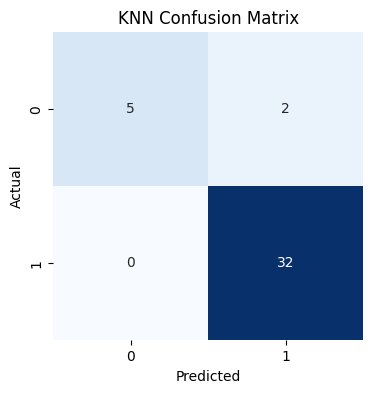

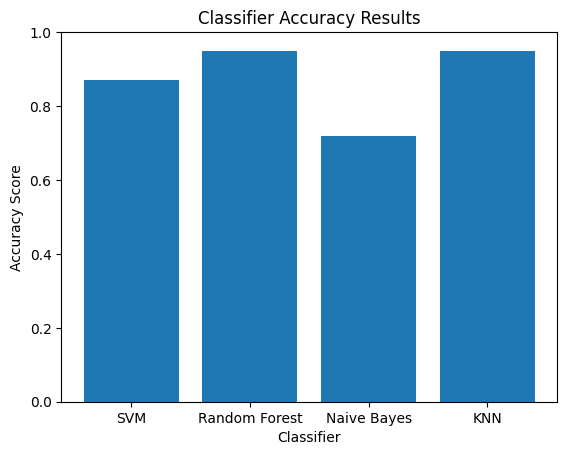

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot confusion matrix for SVM
plt.figure(figsize=(4,4))
plt.title("SVM Confusion Matrix")
svm_cm_plot = sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for Random Forest
plt.figure(figsize=(4,4))
plt.title("Random Forest Confusion Matrix")
rfc_cm_plot = sns.heatmap(rfc_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(4,4))
plt.title("Naive Bayes Confusion Matrix")
nb_cm_plot = sns.heatmap(nb_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for KNN
plt.figure(figsize=(4,4))
plt.title("KNN Confusion Matrix")
knn_cm_plot = sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot accuracy results
classifiers = ['SVM', 'Random Forest', 'Naive Bayes', 'KNN']
accuracy_scores = [svm_acc, rfc_acc, nb_acc, knn_acc]
plt.bar(classifiers, accuracy_scores)
plt.title('Classifier Accuracy Results')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()